In [97]:
setwd("~/Documents/DE/2019/")
require(ggplot2)
require(nlme)


In [98]:
d=read.csv("DE2019_alldata_exp.csv")

In [99]:
head(d)

Bucket,Color.Number,Species,Date_initial_measure,Length_pre,Width_pre,Height_pre,Weight,Mortality_Date,Weight_post,...,Length_post,Width_post,Height_post,live_barnacles,dead_barnacles,polydora_scars,RFTM_Date,RFTM_score,Parasites,X
hsHM1,W1,CV,,NA,NA,,1.89,,2.49,...,NA,NA,NA,NA,NA,NA,NA,,NA,
hsHM1,W2,CV,,NA,NA,,1.32,,1.33,...,NA,NA,NA,NA,NA,NA,NA,,NA,
hsHM1,W3,CV,,NA,NA,,1,,1.15,...,NA,NA,NA,NA,NA,NA,NA,,NA,
hsHM1,W4,CV,,NA,NA,,1.43,,1.68,...,NA,NA,NA,NA,NA,NA,NA,,NA,
hsHM1,W5,CV,,NA,NA,,2.01,,2.4,...,NA,NA,NA,NA,NA,NA,NA,,NA,
hsHM1,W6,CV,,NA,NA,,1.63,,1.71,...,NA,NA,NA,NA,NA,NA,NA,,NA,


In [100]:
d$Density=ifelse(substr(d$Bucket,3,3)=="L", "Low", "High")
d$Diversity=ifelse(substr(d$Bucket,4,4)=="P", "Poly", "Mono")
d$Salinity=ifelse(substr(d$Bucket,1,1)=="l", "Low", "High")

In [101]:
d$RFTM_score[d$RFTM_score==""]=0

In [102]:
d$RFTM_score=as.numeric(as.character(d$RFTM_score))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [107]:
d$RFTM_score[is.na(d$RFTM_score)]=0

In [124]:
prevalence=with(d, tapply(RFTM_score, list(Salinity, Species, Density, Diversity, Bucket),  function(x) 100*(sum(x>0, na.rm=TRUE)/sum(!is.na(x)))))

In [125]:
prevalence=na.omit(as.data.frame.table(prevalence, response=RFTM.score))
colnames(prevalence)=c("Salinity", "Species","Density", "Diversity", "Bucket", "RFTM_prev")

In [126]:
multi = function(x) {
      c(avg = mean(x, na.rm=TRUE), se = sd(x, na.rm=TRUE)/sqrt(length(x)) )
}

In [127]:
prev=prevalence[prevalence$Species=="CV",]

In [134]:
prev=aggregate(RFTM_prev~Density+Diversity+Species+Salinity, data=prevalence, FUN=multi)
prev$avg=prev$RFTM_prev[,1]
prev$sd=prev$RFTM_prev[,2]
#prev=prev[-4]

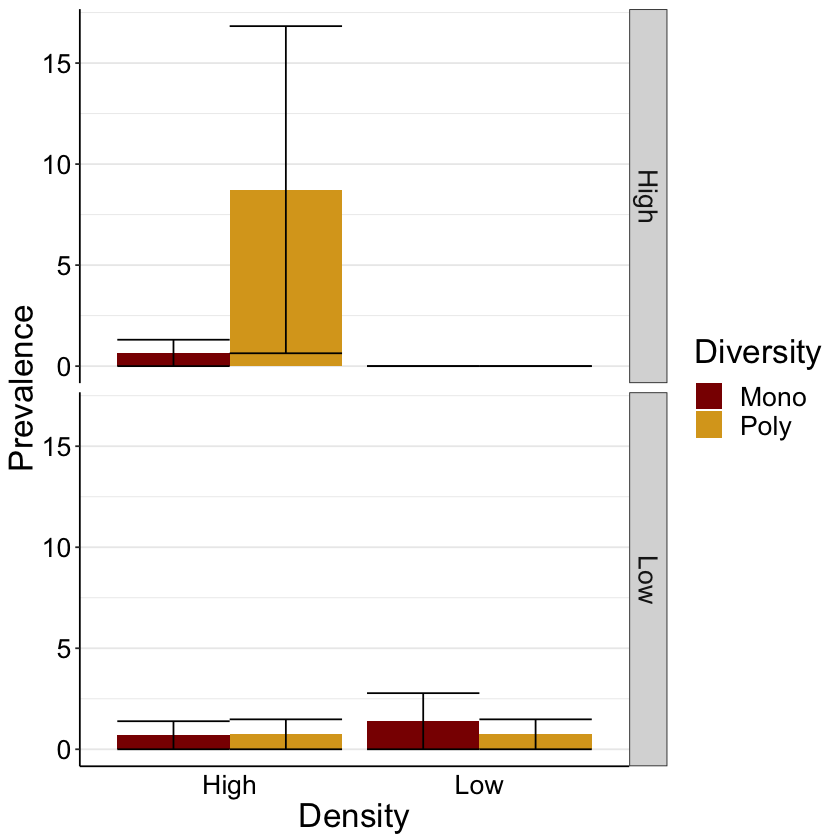

In [136]:
ggplot(prev[prev$Species=="CV",], aes(x = Density, y = avg, fill=Diversity)) +
scale_fill_manual(values=c("darkred", "goldenrod"))+
        geom_bar(stat="identity", position="dodge")+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") +
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("Prevalence")  + facet_grid(Salinity~.)

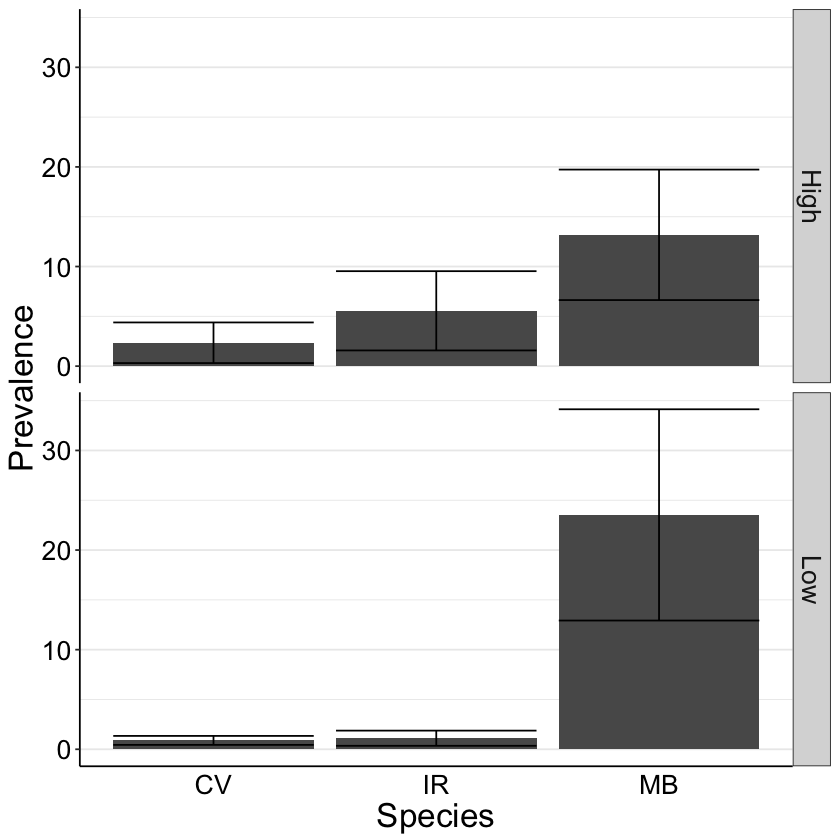

In [138]:
prevsp=aggregate(RFTM_prev~Species+Salinity, data=prevalence, FUN=multi)
prevsp$avg=prevsp$RFTM_prev[,1]
prevsp$sd=prevsp$RFTM_prev[,2]

ggplot(prevsp, aes(x = Species, y = avg)) +
        geom_bar(stat="identity", position="dodge")+
 geom_errorbar(aes(ymin=avg-sd, ymax=avg+sd), position="dodge") +
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("Prevalence")  + facet_grid(Salinity~.)

In [115]:
head(d)

Bucket,Color.Number,Species,Date_initial_measure,Length_pre,Width_pre,Height_pre,Weight,Mortality_Date,Weight_post,...,dead_barnacles,polydora_scars,RFTM_Date,RFTM_score,Parasites,X,Density,Diversity,Salinity,RFTM
hsHM1,W1,CV,,NA,NA,,1.89,,2.49,...,NA,NA,NA,0,NA,,High,Mono,High,NA
hsHM1,W2,CV,,NA,NA,,1.32,,1.33,...,NA,NA,NA,0,NA,,High,Mono,High,NA
hsHM1,W3,CV,,NA,NA,,1,,1.15,...,NA,NA,NA,0,NA,,High,Mono,High,NA
hsHM1,W4,CV,,NA,NA,,1.43,,1.68,...,NA,NA,NA,0,NA,,High,Mono,High,NA
hsHM1,W5,CV,,NA,NA,,2.01,,2.4,...,NA,NA,NA,0,NA,,High,Mono,High,NA
hsHM1,W6,CV,,NA,NA,,1.63,,1.71,...,NA,NA,NA,0,NA,,High,Mono,High,NA


In [116]:
positive=d[d$RFTM_score>0,]


In [117]:
head(positive)

,Bucket,Color.Number,Species,Date_initial_measure,Length_pre,Width_pre,Height_pre,Weight,Mortality_Date,Weight_post,...,dead_barnacles,polydora_scars,RFTM_Date,RFTM_score,Parasites,X,Density,Diversity,Salinity,RFTM
92,hsHM6,O28,CV,Erik Assigned Bucket 9/14,NA,NA,,2.38,,2.98,...,NA,NA,NA,0.5,NA,,High,Mono,High,NA
161,hsHP2,W12,CV,,NA,NA,,2.16,,2.85,...,NA,NA,NA,0.5,NA,,High,Poly,High,NA
162,hsHP2,W13,CV,,NA,NA,,2.4,,3.12,...,NA,NA,NA,0.5,NA,,High,Poly,High,NA
163,hsHP2,W14,CV,,NA,NA,,1.48,,1.71,...,NA,NA,NA,0.5,NA,,High,Poly,High,NA
164,hsHP2,W15,CV,,NA,NA,,2.49,,3.23,...,NA,NA,NA,0.5,NA,,High,Poly,High,NA
165,hsHP2,W16,CV,,NA,NA,,2.17,,2.91,...,NA,NA,NA,0.5,NA,,High,Poly,High,NA


In [ ]:
ggplot(prevalence, aes(x=PerCV, y=RFTM_score)) + facet_grid(Site~.)+geom_point(aes(color=TotalDensity))

In [118]:
print(positive)

     Bucket Color.Number Species      Date_initial_measure Length_pre Width_pre
92    hsHM6          O28      CV Erik Assigned Bucket 9/14         NA        NA
161   hsHP2          W12      CV                                   NA        NA
162   hsHP2          W13      CV                                   NA        NA
163   hsHP2          W14      CV                                   NA        NA
164   hsHP2          W15      CV                                   NA        NA
165   hsHP2          W16      CV                                   NA        NA
167   hsHP2          W18      CV                                   NA        NA
168   hsHP2          W19      CV                                   NA        NA
169   hsHP2          W20      CV                                   NA        NA
170   hsHP2           O6      CV                                   NA        NA
171   hsHP2           O7      CV                                   NA        NA
172   hsHP2           O8      CV        

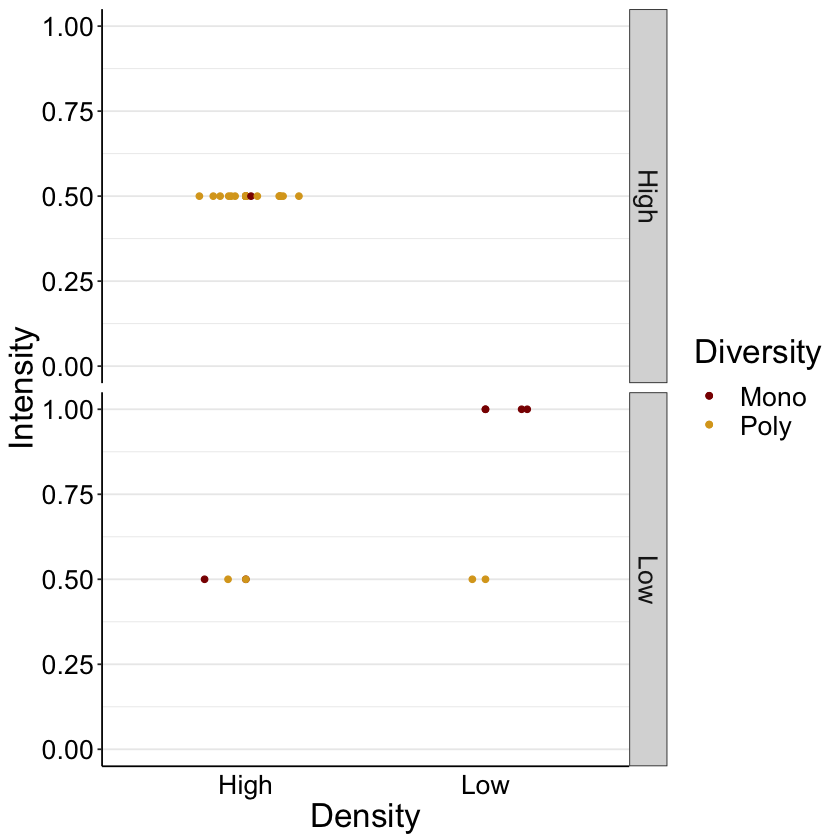

In [145]:
ggplot(positive[positive$Species=="CV",], aes(x = Density, y = RFTM_score, color=Diversity)) +
scale_color_manual(values=c("darkred", "goldenrod"))+
        geom_point()+
geom_jitter(width=0.25, height=0)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylim(0,1)+
ylab("Intensity")+ facet_grid(Salinity~.)

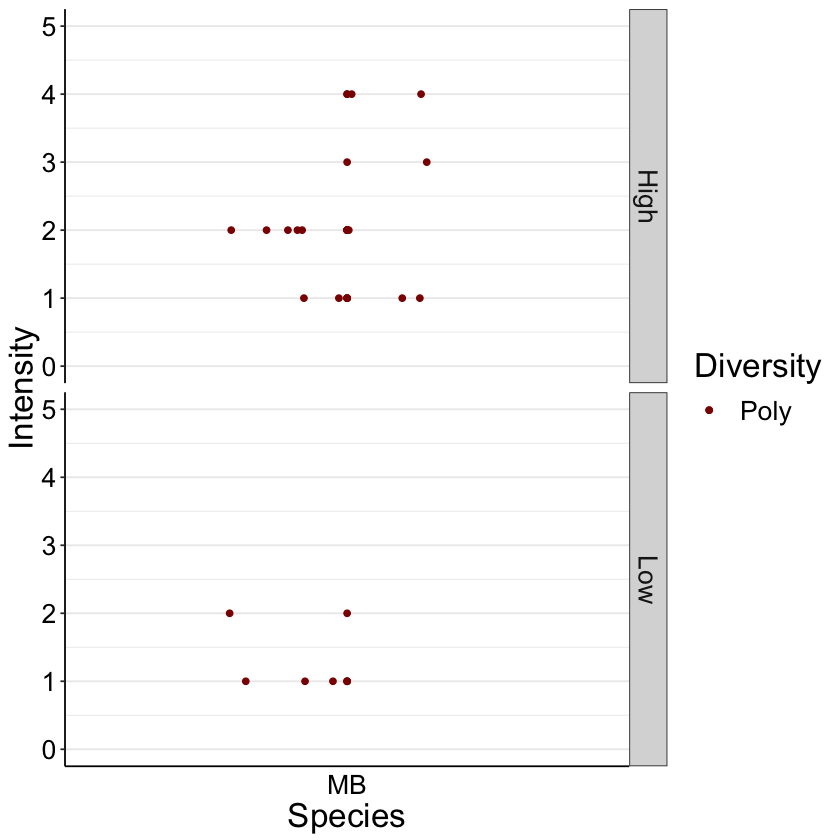

In [143]:
ggplot(positive[positive$Species=="MB",], aes(x = Species, y = RFTM_score, color=Diversity)) +
scale_color_manual(values=c("darkred", "goldenrod"))+
        geom_point()+
geom_jitter(width=0.25, height=0)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylim(0,5)+
ylab("Intensity")+ facet_grid(Salinity~.)

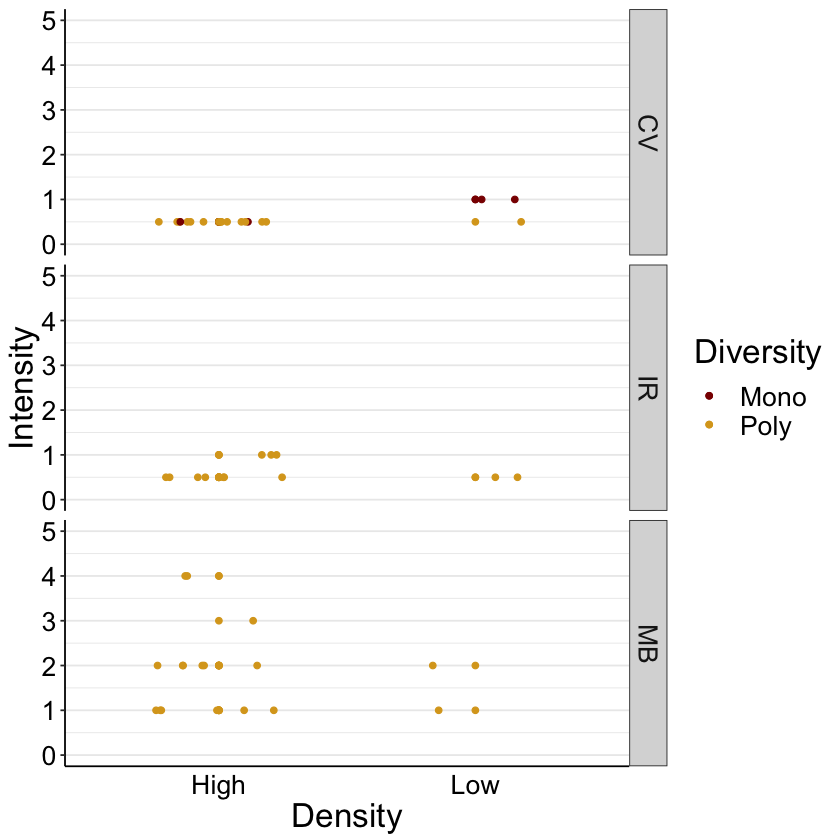

In [123]:
ggplot(positive, aes(x = Density, y = RFTM_score, color=Diversity)) +
scale_color_manual(values=c("darkred", "goldenrod"))+
        geom_point()+
geom_jitter(width=0.25, height=0)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylim(0,5)+
ylab("Intensity") + facet_grid(Species~.)